# Lab 10: Bootstrap and Predictions

## Your Name: Caroline Petersen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# style
# plt.style.use('fivethirtyeight')
plt.style.use("ggplot")

## 1. Diamonds 

The data frame `diamonds` (loaded below) contains data about price and weight of 600 diamonds (among other info).

In [2]:
diamonds = pd.read_csv("diamonds.csv")
diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In this section we will use a sample and bootstrap to predict the average ratio of price over weight for the whole data frame.

**Question 1.1:** Add a column labeled `Ratio` to the `diamonds` data frame containing the ratio between the price and (carat) weight.

In [3]:
diamonds["Ratio"] = diamonds["Price"] / diamonds["Carat Weight"]
diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Ratio
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,4699.090909
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,4180.722892
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3744.705882
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4802.197802
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3820.481928
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6067.961165
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5328.000000
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6036.274510
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,8823.622047


**Question 1.2:** Compute the *average* and *standard deviation* of the ratio of price over weight for the whole `diamonds` data frame.

In [4]:
diamonds_ratio_aver = diamonds["Ratio"].mean()
diamonds_ratio_sd = diamonds["Ratio"].std()

print(f"Diamonds average ratio: {diamonds_ratio_aver}.")
print(f"Standard deviation:     {diamonds_ratio_sd}.")

Diamonds average ratio: 7821.411595285629.
Standard deviation:     3905.439565640553.


Let's now get a sample to be used to estimate the real average.

**Question 1.3:** Create a sample from `diamonds` with 100 samples (*without replacement*).  (Reset the index, dropping the old one!)

In [5]:
sample_size = 100
sample = diamonds.sample(sample_size).reset_index(drop=True)
sample

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Ratio
0,2.03,Ideal,F,VS2,EX,EX,GIA,31773,15651.724138
1,0.90,Ideal,H,VS1,VG,EX,AGSL,4634,5148.888889
2,1.08,Very Good,F,VVS2,G,VG,GIA,8221,7612.037037
3,1.28,Ideal,G,SI1,VG,VG,GIA,7660,5984.375000
4,1.13,Ideal,H,SI1,EX,EX,GIA,6075,5376.106195
...,...,...,...,...,...,...,...,...,...
95,0.90,Very Good,G,SI1,EX,G,GIA,3752,4168.888889
96,0.81,Good,H,SI1,G,VG,GIA,2599,3208.641975
97,2.01,Very Good,H,VS2,VG,VG,GIA,19591,9746.766169
98,2.00,Very Good,E,VVS2,EX,EX,GIA,35038,17519.000000


**Question 1.4.:** Write a function that takes in a data frame with a column labeled `Ratio` and returns the average of the column.

In [6]:
def ratio_aver(df):
    return df["Ratio"].mean()

ratio_aver(sample)

7419.733174187988

**Question 1.5:** Here we do the bootstrap.  Resample the `sample` data frame (*with replacement*) 5,000 times, computing the average of the ratios for each resample, and saving it in an array named `averages`.

In [7]:
# number of resamples
num_resamples = 5_000

# initialize averages with 0's
averages = np.zeros(num_resamples)

for i in np.arange(num_resamples):
    # resample once
    resample = sample.sample(frac=1, replace=True)
    
    # add ratio average to averages array
    averages[i] = ratio_aver(resample)

Here is the histogram for the obtained averages:

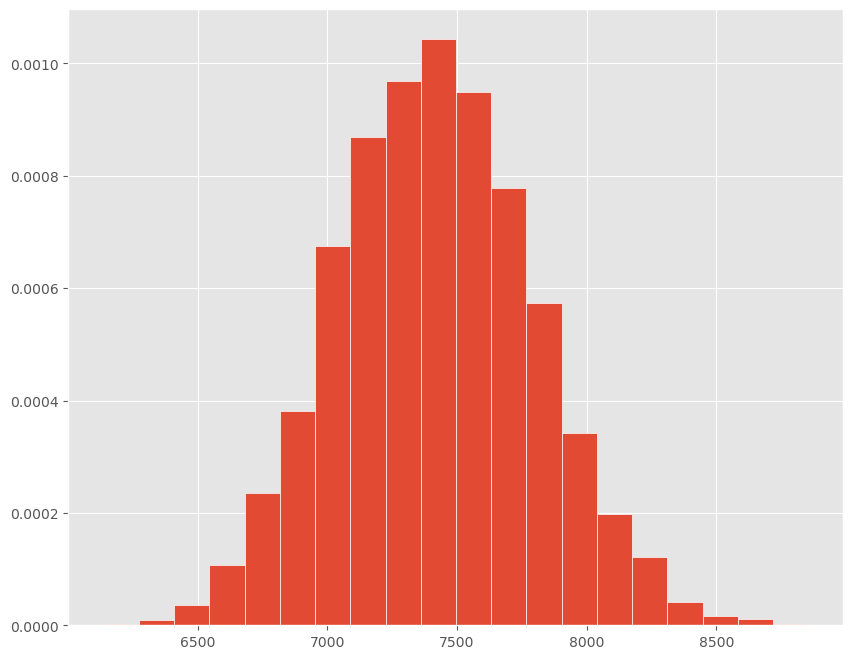

In [8]:
plt.hist(averages, bins=20, density=True, ec="white")

plt.show()

We will now compute a confidence interval.

**Question 1.6:** Write a function that `confidence_interval` that takes a percent (like 80, for the 80% confidence interval) and returns a list with the left and right boundaries for the confidence interval of the given percent.

*Hint:* You should use percentiles (of `averages`) to compute the left and right boundaries for our confidence interval.  The variables `left_perc` and `right_perc` are the percentiles used to get these boundaries (computed using the argument `percent`).

In [9]:
def confidence_interval(percent):
    # percentile for the left boundary
    left_perc = (100 - percent) / 2
    
    # percentile for the right boundary
    right_perc = percent + left_perc

    # left boundary for the confidence interval
    left = np.percentile(averages, left_perc)
    
    # right boundary for the confidence interval
    right = np.percentile(averages, right_perc)

    return [left, right]

Let's test it computing the 80% confidence interval:

In [10]:
ci_boundaries = confidence_interval(80)
ci_boundaries

[6942.319092587025, 7901.652010497374]

Let's now plot the histogram again with the confidence interval and actual value for the average of the ratios in the the `diamonds` data frame.

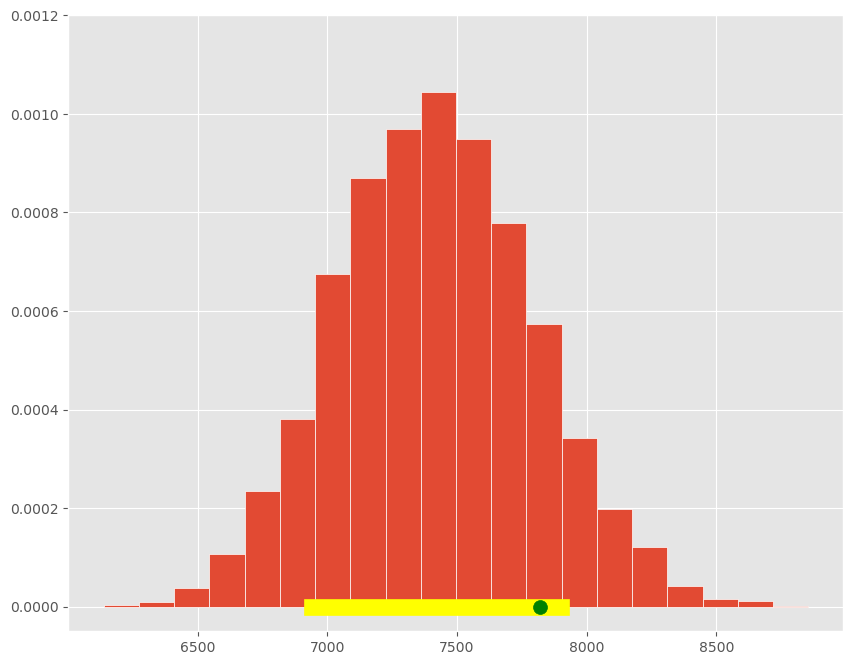

In [11]:
plt.hist(averages, bins=20, density=True, ec="white", zorder=1)
plt.plot(ci_boundaries, [0, 0], color="yellow", lw=12, zorder=2)
plt.scatter([diamonds_ratio_aver], [0], color="green", s=100, zorder=3)

plt.ylim(-0.00005, 0.0012)

plt.show()

Now we will find (a close approximation for) the smallest percentage for the confidence interval that contains the actual average ratio for the whole data frame.

**Question 1.7:** Find the p-value for the actual average (`diamonds_ratio_aver`).  Note that since the p-value depends on which side of the distribution we are, we have two cases, depending if it is on the left or right of the median of `averages`.

In [12]:
# median of the array averages
averages_median = np.percentile(averages, 50, method="inverted_cdf")

if diamonds_ratio_aver <= averages_median:
    # the real value is on the left side of the graph
    p_value = np.count_nonzero(averages <= diamonds_ratio_aver) / len(averages)
else:
    # the real value is on the right side of the graph
    p_value = np.count_nonzero(averages >= diamonds_ratio_aver) / len(averages)

p_value

0.1444

**Question 1.8:** Use the `p_value` above to find the smallest percentage for a confidence interval to contain the average ratio for the whole `diamonds` data frame (i.e., to contain `diamonds_ratio_aver`).

In [13]:
# percentage for the smallest confidence interval containing diamons_ratio_average
confidence = 100 - 100 * 2 * p_value
confidence

71.12

In the plot below, you should see the green dot (the actual median) at the very end of the yellow bar (the confidence interval).

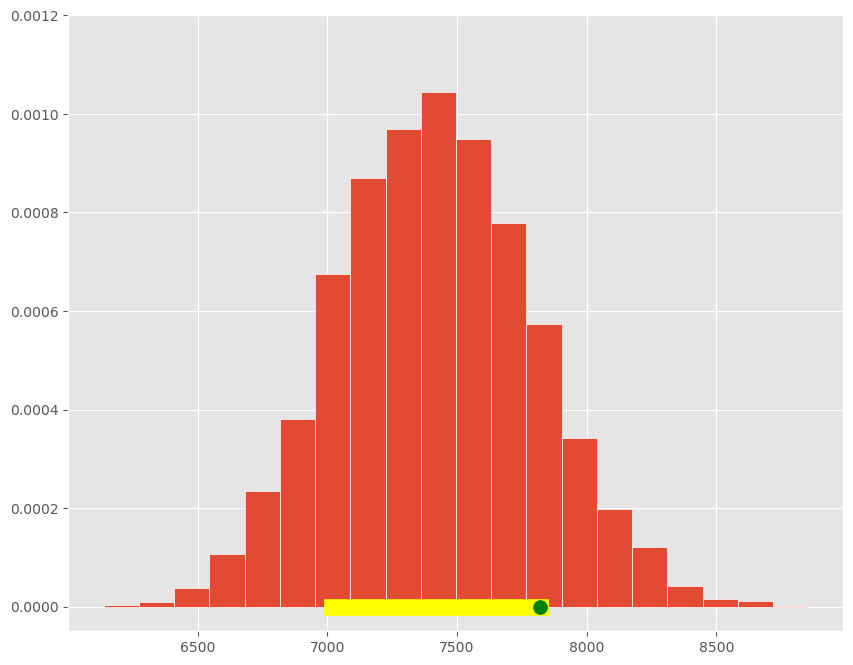

In [14]:
ci_boundaries = confidence_interval(confidence)

plt.hist(averages, bins=20, density=True, ec="white", zorder=1)
plt.plot(ci_boundaries, [0, 0], color="yellow", lw=12, zorder=2)
plt.scatter([diamonds_ratio_aver], [0], color="green", s=100, zorder=3)

plt.ylim(-0.00005, 0.0012)

plt.show()

## 2. Female Literacy and Fertility

In this section will investigate the relation between female literacy and fertility.

First, load these functions:

In [15]:
def standard_units(array):
    "Convert any array of numbers to standard units."
    return (array - np.mean(array)) / np.std(array)


def regression_data(df, label_x, label_y):
    """
    Given a data frame and columns labels for the x and y columns,
    computes correlation, slope, intercept, and prediction function.
    """

    r = df[label_x].corr(df[label_y])

    slope = r * df[label_y].std() / df[label_x].std()

    intercept = df[label_y].mean() - slope * df[label_x].mean()

    prediction_fct = lambda x: slope * x + intercept

    return r, slope, intercept, prediction_fct


def residual(df, x_label, y_label, prediction_fct=None):
    """
    Computers the residual between observed and estimated values.
    """
    if prediction_fct is None:
        prediction_fct = regression_data(df, x_label, y_label)[-1]

    return df[y_label] - prediction_fct(df[x_label])


def residual_plot(df, x_label, y_label):
    """
    Residual plot of colums labeled x_label and y_label from
    data frame df.
    """
    # we use different colors from scatter graphs
    cmap = plt.get_cmap("tab10")

    x_array = df[x_label]
    t = pd.DataFrame({x_label: x_array, "residuals": residual(df, x_label, y_label)})
    t.plot(x_label, "residuals", kind="scatter", color=cmap(2))
    xlims = np.array([x_array.min(), x_array.max()])
    plt.plot(xlims, np.array([0, 0]), lw=4, color=cmap(4))
    plt.title("Residual Plot")


def mult_scatter(df):
    """
    Given a data frame, draws the scatter graphs with the
    first column as x, and every other column as y.
    """
    # column labels
    cols = df.columns

    # colors
    cmap = plt.get_cmap("tab10")

    # initialize plot
    fig, ax = plt.subplots()

    # plot graphs
    for i, col in enumerate(cols[1:]):
        df.plot(0, i + 1, kind="scatter", label=cols[i + 1], color=cmap(i), ax=ax)

    # set the x-label
    plt.xlabel(cols[0])
    plt.ylabel("")


def scatter_and_fit(df):
    """
    Plot multiple scatter plots and the fitted line for the first.
    """
    # column labels
    cols = df.columns
    n_cols = len(cols)

    # colors
    cmap = plt.get_cmap("tab10")

    # initialize plot
    fig, ax = plt.subplots()

    # plot graphs
    for i, col in enumerate(cols[1:]):
        df.plot(0, i + 1, kind="scatter", label=cols[i + 1], color=cmap(i), ax=ax)

    # if only two columns
    if n_cols == 2:
        plt.ylabel(cols[1])
        ax.get_legend().remove()
    else:
        plt.ylabel("")

    # fitted line
    prediction_fct = regression_data(df, cols[0], cols[1])[-1]
    xs = np.array([df[cols[0]].min(), df[cols[0]].max()])
    ys = prediction_fct(xs)
    plt.plot(xs, ys, color=cmap(n_cols + 1), lw=3)

    # set the x-label
    plt.xlabel(cols[0])

Now let's load our data frame.  

In [16]:
full_df = pd.read_csv("female_literacy_fertility.csv")
full_df

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"
...,...,...,...,...,...
157,Vanuatu,OCE,79.5,3.883,"233,866"
158,Samoa,OCE,98.5,3.852,"178,869"
159,Sao Tomé-et-Principe,AF,83.3,3.718,"160,174"
160,Aruba,LAT,98.0,1.732,"105,455"


It contains female literacy rates and fertility rates for 162 countries.

We will only look at those two columns, so we drop the rest.

In [17]:
female_literacy_fetitlity = full_df[["female literacy", "fertility"]]

female_literacy_fetitlity

,female literacy,fertility
0,90.5,1.769
1,50.8,2.682
2,99.0,2.077
3,88.8,2.132
4,90.2,1.827
...,...,...
157,79.5,3.883
158,98.5,3.852
159,83.3,3.718
160,98.0,1.732


First let's see if there is a correlation.

Find the correlation, slope, intercept, and prediction function for fertility based on female literacy.

In [18]:
flf_r, flf_slope, flf_intercept, flf_pred_fct = regression_data(
    female_literacy_fetitlity, "female literacy", "fertility"
)

print(f"Correlation:  {flf_r:.2f}")
print(f"Slope:        {flf_slope:.2f}")
print(f"Intercept:    {flf_intercept:.2f}")

Correlation:  -0.80
Slope:        -0.05
Intercept:    6.87


Remember that a correlation coefficient close to 1 *in absolute value* indicates that the data can be relatively well approximated by a line.

Let's visualize the data:

**Question 2.1:** Plot a scatter graph for literacy and fertility *with a regression line*. 

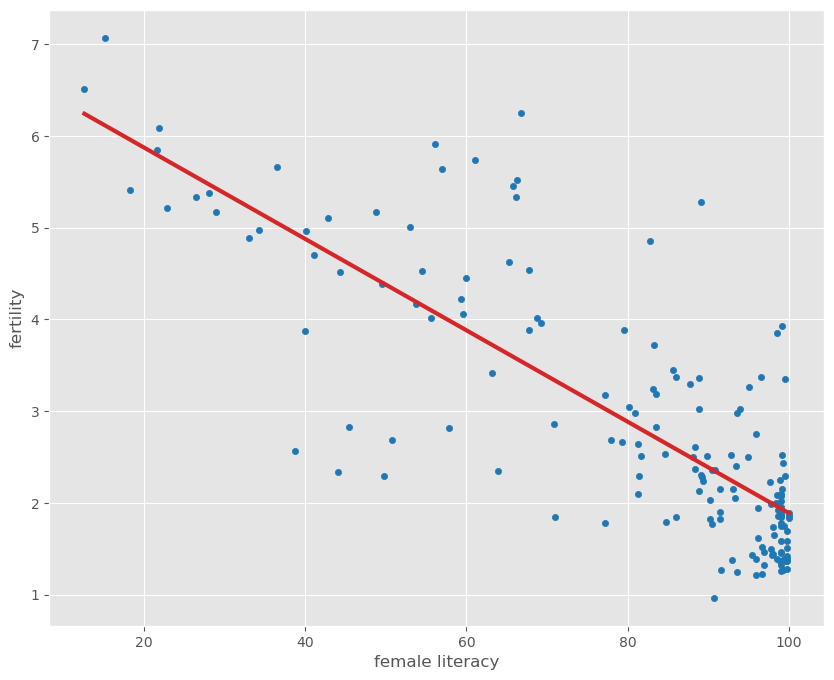

In [19]:
scatter_and_fit(female_literacy_fetitlity)

We will now randomly split our data frame in two parts, with 70%-30% percentages.  We will use the larger part to "train" the regression model and the smaller part to check how well it predicts.

This is a very common practice: we use only part of the data to find the prediction function, and see how well it works on values that were excluded in finding the function.  

If it works well, we have good indication that the approximation will also work well on other values we do not possess (like if we only know the female literacy rate on a country not in our data frame).

The function below does the job:

In [20]:
def split_df(df, first_prop):
    """
    Splits df randomly in two: one with proportion first_prop, and 
    the other containing the rest.
    """
    
    df1 = df.sample(frac=first_prop)
    
    df2 = df.drop(df1.index)
    
    return df1.reset_index(drop=True), df2.reset_index(drop=True)

Let's split then:

In [21]:
train_df, test_df = split_df(female_literacy_fetitlity, 0.7)

**Question 2.2:** Find the correlation, slope, intercept, and prediction function for fertility based on female literacy for `tain_df` and graph its scatter plot *with the regression line*.

In [22]:
train_r, train_slope, train_intercept, train_pred_fct = regression_data(
    train_df, "female literacy", "fertility"
)

print(f"Correlation:  {train_r:.2f}")
print(f"Slope:        {train_slope:.2f}")
print(f"Intercept:    {train_intercept:.2f}")

Correlation:  -0.81
Slope:        -0.05
Intercept:    6.85


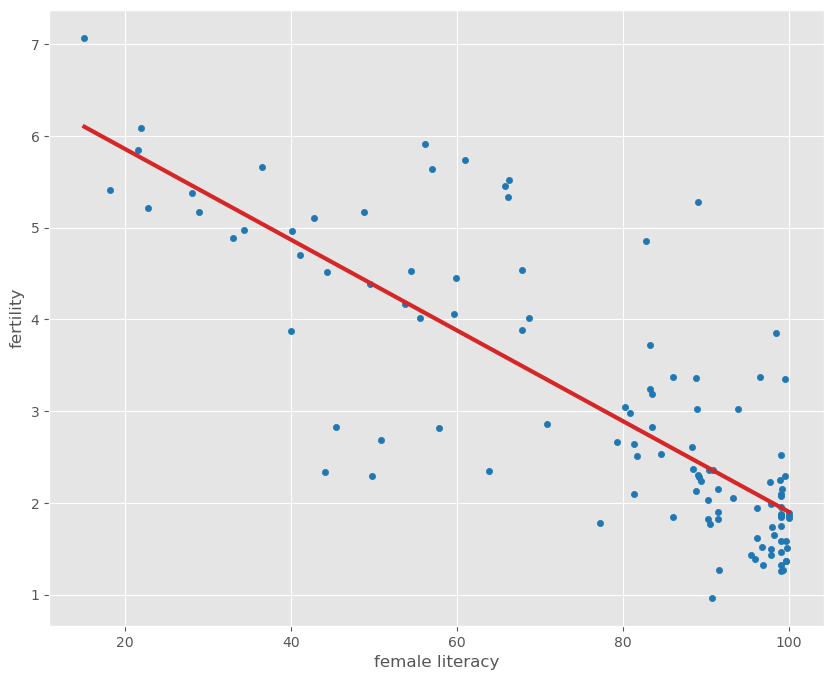

In [23]:
scatter_and_fit(train_df)

The differences between the whole data frame and the training one should be small:

In [24]:
print(f"Correlation difference:  {flf_r - train_r:.2f}")
print(f"Slope difference:        {flf_slope - train_slope:.2f}")
print(f"Intercept difference:    {flf_intercept - train_intercept:.2f}")

Correlation difference:  0.01
Slope difference:        -0.00
Intercept difference:    0.02


This indicates that we expect the function we obtained from the training data only will likely work well on the test data.

**Question 2.3:** Create a data frame `test_df_pred` that is a copy of `test_df` but with a column labeled `Prediction` added, which contains the fertility predictions (based on female literacy) given by the function `train_pred_fct` from the previous exercise.

In [27]:
test_df_pred = test_df.assign(Predicted=train_pred_fct(test_df["female literacy"]))

test_df_pred.head(10)

,female literacy,fertility,Predicted
0,99.4,1.393,1.931169
1,98.5,1.390,1.975663
2,88.1,2.505,2.489812
3,96.6,1.224,2.069594
4,96.9,1.468,2.054763
5,93.4,2.404,2.227794
6,66.8,6.254,3.542830
7,69.2,3.961,3.424180
8,12.6,6.505,6.222338
9,94.9,2.498,2.153638


Use `mult_scatter` for a scatter graph containing the points for female literacy and fertility from `test_df_pred`, together with the predicted values as well.

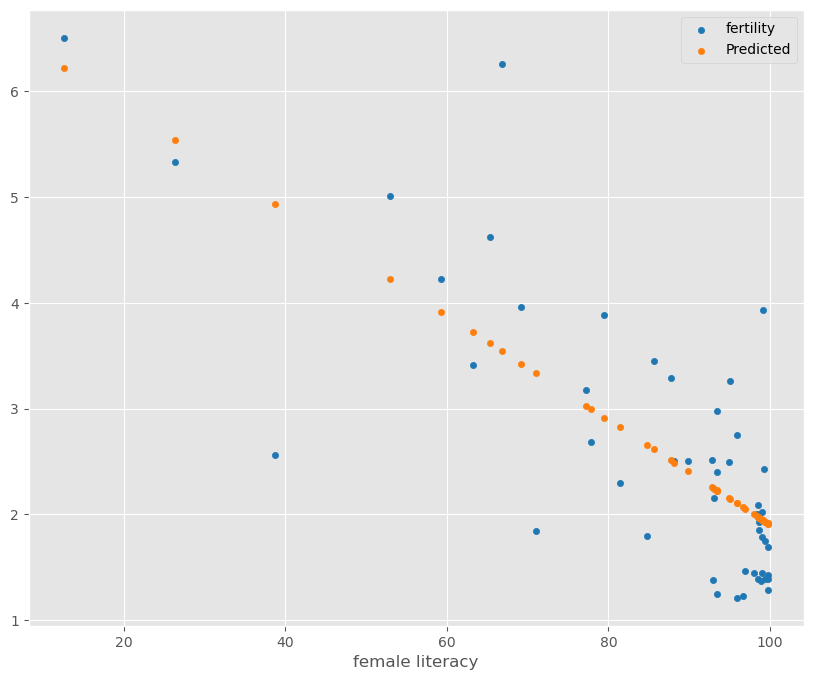

In [28]:
mult_scatter(test_df_pred)

**Question 2.4:**  Add a column labeled `Error` to `test_df_pred`, with the difference between the actual fertility and predicted fertility.

In [29]:
test_df_pred["Error"] = test_df_pred["fertility"] - test_df_pred["Predicted"]
test_df_pred.head(5)

,female literacy,fertility,Predicted,Error
0,99.4,1.393,1.931169,-0.538169
1,98.5,1.390,1.975663,-0.585663
2,88.1,2.505,2.489812,0.015188
3,96.6,1.224,2.069594,-0.845594
4,96.9,1.468,2.054763,-0.586763


**Question 2.5:** Compute the root mean squared error (rmse) for our approximation in `test_df_pred`.

In [30]:
test_rmse = np.sqrt((test_df_pred["Error"] ** 2).mean())
test_rmse

0.8282005203209818

Now let's compare with how well our prediction function did on the actual points used for training.

**Question 2.6:** Compute the root mean squared error (rmse) for our approximation in the *training* data frame `train_df`.

*Hint:* You will need a few lines of code here, but it is very similar to steps you've taken above in Questions 2.3, 2.4, and 2.5.

In [34]:
# copy train_df with predictions
train_df_pred = train_df.assign(Prediction=train_pred_fct(train_df["female literacy"]))

# add error
train_df_pred["Error"] = train_df_pred["fertility"] - train_df_pred["Prediction"]

# rmse
train_rmse = np.sqrt((train_df_pred["Error"] ** 2).mean())

train_rmse

0.8537108205205306

A small difference between rmse's means that the prediction function worked almost as well in the test data as in the training data:

In [35]:
test_rmse - train_rmse

-0.025510300199548808

## 3. Submission
You're finished with lab 10. **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 10 (under Assignments). To export, go to the toolbar at the top of this page, click File > Download as... > Notebook (.ipynb). Then, go to our class's Canvas page and upload your file under "Lab 10".

For easy identification, **please add your surname to the file**, as in: lab_09_DS201_Name.ipynb